In [1]:
import pennylane as qml
import pennylane.numpy as pnp
import numpy as np
import os
import json
from pprint import pprint
cwd = os.getcwd()
print(cwd)

/home/peiyongw/Desktop/Research/QAS-Qiskit


In [2]:
h2_with_only_neighbouring_cnots = '20211123-113657.json'
h2_with_all_cnots = '20211123-025029.json'

In [3]:
import matplotlib        as     mpl
import matplotlib.pyplot as     plt
from   matplotlib        import rc
from   cycler            import cycler

_widths = {
    # a4paper columnwidth = 426.79135 pt = 5.93 in
    # letterpaper columnwidth = 443.57848 pt = 6.16 in
    'onecolumn': {
        'a4paper' : 5.93,
        'letterpaper' : 6.16
    },
    # a4paper columnwidth = 231.84843 pt = 3.22 in
    # letterpaper columnwidth = 240.24199 pt = 3.34 in
    'twocolumn': {
        'a4paper' : 3.22,
        'letterpaper' : 3.34
    }
}

_wide_widths = {
    # a4paper wide columnwidth = 426.79135 pt = 5.93 in
    # letterpaper wide columnwidth = 443.57848 pt = 6.16 in
    'onecolumn': {
        'a4paper' : 5.93,
        'letterpaper' : 6.16
    },
    # a4paper wide linewidth = 483.69687 pt = 6.72 in
    # letterpaper wide linewidth = 500.48400 pt = 6.95 in
    'twocolumn': {
        'a4paper' : 6.72,
        'letterpaper' : 6.95
    }
}

_fontsizes = {
    10 : {
        'tiny' : 5,
        'scriptsize' : 7,
        'footnotesize' : 8, 
        'small' : 9, 
        'normalsize' : 10,
        'large' : 12, 
        'Large' : 14, 
        'LARGE' : 17,
        'huge' : 20,
        'Huge' : 25
    },
    11 : {
        'tiny' : 6,
        'scriptsize' : 8,
        'footnotesize' : 9, 
        'small' : 10, 
        'normalsize' : 11,
        'large' : 12, 
        'Large' : 14, 
        'LARGE' : 17,
        'huge' :  20,
        'Huge' :  25
    },
    12 : {
        'tiny' : 6,
        'scriptsize' : 8,
        'footnotesize' : 10, 
        'small' : 11, 
        'normalsize' : 12,
        'large' : 14, 
        'Large' : 17, 
        'LARGE' : 20,
        'huge' :  25,
        'Huge' :  25
    }
}

_width         = 1
_wide_width    = 1
_quantumviolet = '#53257F'
_quantumgray   = '#555555'

# Sets up the plot with the fitting arguments so that the font sizes of the plot
# and the font sizes of the document are well aligned
#
#     columns : string = ('onecolumn' | 'twocolumn')
#         the columns you used to set up your quantumarticle, 
#         defaults to 'twocolumn'
#
#     paper : string = ('a4paper' | 'letterpaper')
#         the paper size you used to set up your quantumarticle,
#         defaults to 'a4paper'
#
#     fontsize : int = (10 | 11 | 12)
#         the fontsize you used to set up your quantumarticle as int
#
#     (returns) : dict
#         parameters that can be used for plot adjustments

def global_setup(columns = 'onecolumn', paper = 'a4paper', fontsize = 10):
    plt.rcdefaults()
        
    # Seaborn white is a good base style
    plt.style.use(['seaborn-white', './quantum-plots.mplstyle'])
    
    try:        
        # This hackery is necessary so that jupyther shows the plots
        mpl.use("pgf")
        %matplotlib inline
        plt.plot()
        mpl.use("pgf")
    except:
        print('Call to matplotlib.use had no effect')
        
    mpl.interactive(False) 
    
    # Now prepare the styling that depends on the settings of the document
    
    global _width 
    _width = _widths[columns][paper]
    
    global _wide_width 
    _wide_width = _wide_widths[columns][paper]
    
    # Use the default fontsize scaling of LaTeX
    global _fontsizes
    fontsizes = _fontsizes[fontsize]
    
    plt.rcParams['axes.labelsize'] = fontsizes['small']
    plt.rcParams['axes.titlesize'] = fontsizes['large']
    plt.rcParams['xtick.labelsize'] = fontsizes['footnotesize']
    plt.rcParams['ytick.labelsize'] = fontsizes['footnotesize']
    plt.rcParams['font.size'] = fontsizes['small']
    
    return {
            'fontsizes' : fontsizes,
            'colors' : {
                'quantumviolet' : _quantumviolet,
                'quantumgray' : _quantumgray
            }
        }
    

# Sets up the plot with the fitting arguments so that the font sizes of the plot
# and the font sizes of the document are well aligned
#
#     aspect_ratio : float
#         the aspect ratio (width/height) of your plot
#         defaults to the golden ratio
#
#     width_ratio : float in [0, 1]
#         the width of your plot when you insert it into the document, e.g.
#         .8 of the regular width
#         defaults to 1.0
#
#     wide : bool 
#         indicates if the figures spans two columns in twocolumn mode, i.e.
#         when the figure* environment is used, has no effect in onecolumn mode 
#         defaults to False
#
#     (returns) : matplotlib figure object
#         the initialized figure object

def plot_setup(aspect_ratio = 1/1.62, width_ratio = 1.0, wide = False):
    width = (_wide_width if wide else _width) * width_ratio
    height = width * aspect_ratio
           
    return plt.figure(figsize=(width,height), dpi=120, facecolor='white')
    
print('Setup methods loaded')

props = global_setup(columns = 'onecolumn', paper = 'a4paper', fontsize = 12)

print('Global props:')
for key in props:
    print(key, ':')
    for subkey in props[key]:
        print('    ', subkey, ': ', props[key][subkey])

Setup methods loaded
Global props:
fontsizes :
     tiny :  6
     scriptsize :  8
     footnotesize :  10
     small :  11
     normalsize :  12
     large :  14
     Large :  17
     LARGE :  20
     huge :  25
     Huge :  25
colors :
     quantumviolet :  #53257F
     quantumgray :  #555555


In [4]:
with open(os.path.join(cwd, h2_with_only_neighbouring_cnots)) as f:
    neighbouring_cnots = json.load(f)

with open(os.path.join(cwd, h2_with_all_cnots)) as f:
    all_cnots = json.load(f)

E_fci = -1.136189454088
Min_Energy = E_fci

In [5]:
print(neighbouring_cnots.keys())
pprint(neighbouring_cnots['op_list'])
print(len(neighbouring_cnots['op_list']))
# count the number of parameters
neighbouring_cnots_num_parameters = 0
for c in neighbouring_cnots['op_list']:
    if c[2] != None:
        neighbouring_cnots_num_parameters = neighbouring_cnots_num_parameters + len(c[2])
print()
print(neighbouring_cnots_num_parameters)

dict_keys(['task', 'pool', 'params', 'k', 'op_list', 'search_reward_list', 'fine_tune_loss'])
[['Rot',
  [1],
  [-0.36035553210944904, -0.2097332840820597, -0.06084340190092871]],
 ['CNOT', [1, 2], None],
 ['Rot', [0], [0.0963336843691437, -1.5988894373648321, -1.3741837757892812]],
 ['Rot',
  [1],
  [-0.6676694614272687, -4.5833561306525133e-10, -0.7772754344764634]],
 ['CNOT', [2, 3], None],
 ['CNOT', [1, 0], None],
 ['CNOT', [3, 2], None],
 ['Rot', [0], [-1.5684858149953376, 1.4466860551649277, -1.591661780755852]],
 ['CNOT', [1, 0], None],
 ['Rot', [0], [0.43072805557820215, 0.21619904358729583, 0.47229360590490566]],
 ['CNOT', [1, 2], None],
 ['CNOT', [3, 2], None],
 ['CNOT', [1, 0], None],
 ['Rot',
  [2],
  [1.2308955204658614, 1.3463387740990852e-06, -0.009166048367849948]],
 ['Rot', [3], [-0.9151266834214401, -1.5710373624972542, -3.1416205018683194]],
 ['CNOT', [0, 1], None],
 ['Rot', [1], [2.1031539870139637, 7.887415744901472e-10, 2.365012996219899]],
 ['CNOT', [1, 2], None]

In [6]:
nei_cnots_search_rewards = [s[2] for s in neighbouring_cnots['search_reward_list']]
neigh_cnots_fine_tune_loss = neighbouring_cnots['fine_tune_loss']
#print(nei_cnots_search_rewards)
print()
#print(neigh_cnots_fine_tune_loss)

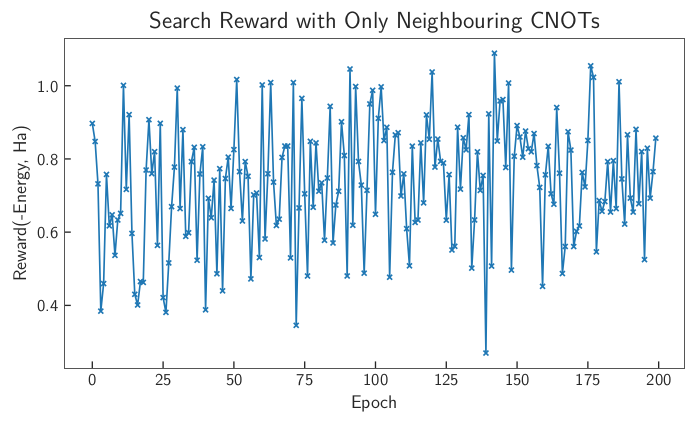

In [22]:
fig = plot_setup()
plt.plot(list(range(len(nei_cnots_search_rewards))), nei_cnots_search_rewards,marker = 'x')
plt.xlabel('Epoch')
plt.ylabel('Reward(-Energy, Ha)')
plt.title("Search Reward with Only Neighbouring CNOTs")
plt.tight_layout()

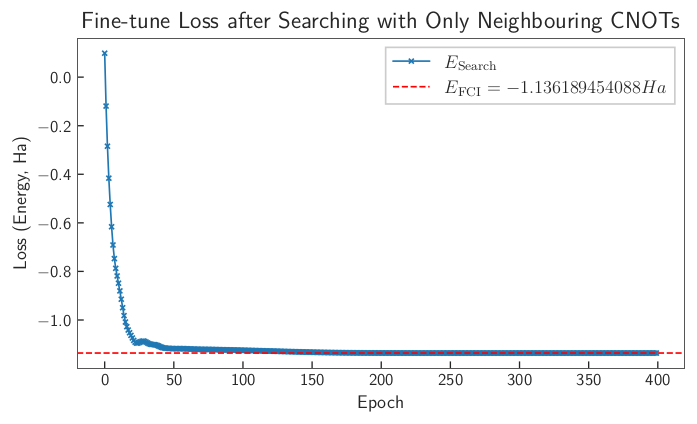

In [29]:
fig = plot_setup()
plt.plot(list(range(len(neigh_cnots_fine_tune_loss))), neigh_cnots_fine_tune_loss,label = r"$E_\mathrm{Search}$",linestyle = '-',marker = 'x')
plt.axhline(y = Min_Energy, color = 'r', linestyle = '--',label = r"$E_\mathrm{FCI}=-1.136189454088 Ha$")
plt.title("Fine-tune Loss after Searching with Only Neighbouring CNOTs")
plt.xlabel('Epoch')
plt.ylabel('Loss (Energy, Ha)')
plt.legend()
plt.tight_layout()

In [9]:
print("Final Energy: ", neigh_cnots_fine_tune_loss[-1])

Final Energy:  -1.136189039840382


In [10]:
all_cnots_search_rewards = [s[2] for s in all_cnots['search_reward_list']]
all_cnots_fine_tune_loss = all_cnots['fine_tune_loss']
pprint(all_cnots['op_list'])
print(len(all_cnots['op_list']))
# count the number of parameters
all_cnots_num_parameters = 0
for c in all_cnots['op_list']:
    if c[2] != None:
        all_cnots_num_parameters = all_cnots_num_parameters + len(c[2])
print()
print(all_cnots_num_parameters)

[['Rot', [2], [0.07763931631071126, -0.31947220040198143, 4.106268053666326]],
 ['Rot', [1], [-1.3838582257348004, 0.055705084034952876, 0.23963222664027886]],
 ['Rot', [3], [1.5337807879123966, -0.8943870538330008, -1.1891004314685756]],
 ['CNOT', [3, 2], None],
 ['CNOT', [2, 1], None],
 ['Rot', [2], [-1.1829191429808188, -0.9854672947110391, -0.6479856637008323]],
 ['Rot', [1], [0.8795327373895832, 0.4216176561335897, 0.6948734307962448]],
 ['CNOT', [2, 3], None],
 ['Rot', [2], [0.7073692016961859, 0.14747453386799272, 1.932355288421042]],
 ['CNOT', [1, 3], None],
 ['Rot', [3], [0.8693362975171051, -0.30371889393611645, -2.415172774817746]],
 ['Rot', [1], [-0.285306445556646, 0.7896869678078076, 0.35400725170457464]],
 ['CNOT', [3, 2], None],
 ['Rot',
  [0],
  [0.7577262894641833, -3.0807683577079305e-10, -0.745891059507199]],
 ['Rot', [2], [-0.23995968561888262, -1.7728304424111598, -1.238063992213477]],
 ['CNOT', [0, 2], None],
 ['Rot',
  [0],
  [-1.0754261399049465, -1.48934546066

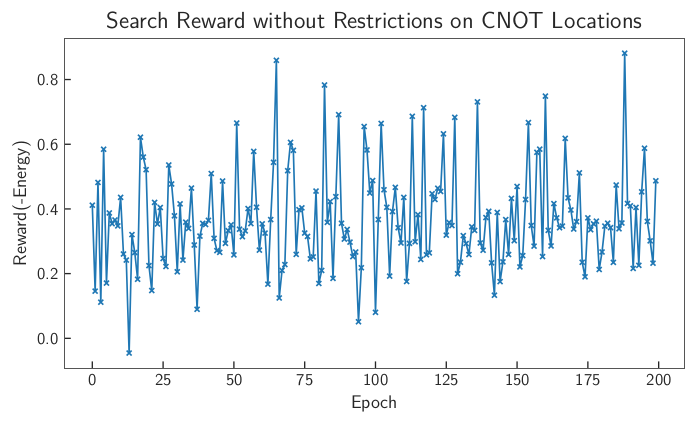

In [24]:
fig = plot_setup()
plt.plot(list(range(len(all_cnots_search_rewards))), all_cnots_search_rewards,marker = 'x')
plt.title("Search Reward without Restrictions on CNOT Locations")
plt.xlabel('Epoch')
plt.ylabel('Reward(-Energy)')
plt.tight_layout()

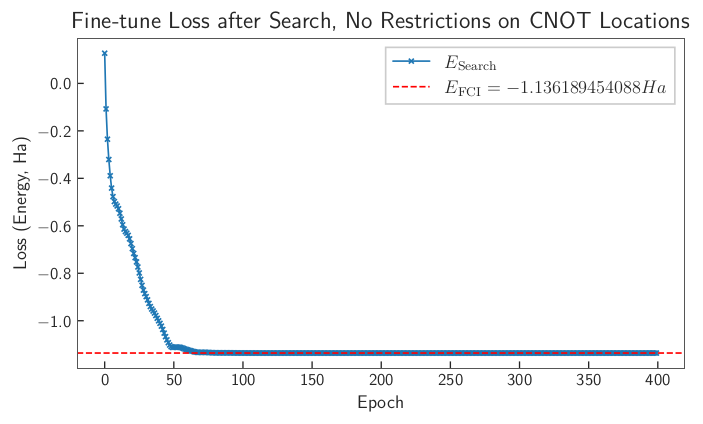

In [30]:
fig = plot_setup()
plt.plot(list(range(len(all_cnots_fine_tune_loss))), all_cnots_fine_tune_loss,label = r"$E_\mathrm{Search}$",linestyle = '-',marker = 'x')
plt.axhline(y = Min_Energy, color = 'r', linestyle = '--',label = r"$E_\mathrm{FCI}=-1.136189454088Ha$")
plt.title("Fine-tune Loss after Search, No Restrictions on CNOT Locations")
plt.xlabel('Epoch')
plt.ylabel('Loss (Energy, Ha)')
plt.legend()
plt.tight_layout()

In [13]:
print("Final Energy: ", all_cnots_fine_tune_loss[-1])

Final Energy:  -1.1361891624004867


In [14]:
h2_with_all_cnots_2 = '20211201-203031.json'
with open(os.path.join(cwd, h2_with_all_cnots_2)) as f:
    all_cnots_2 = json.load(f)

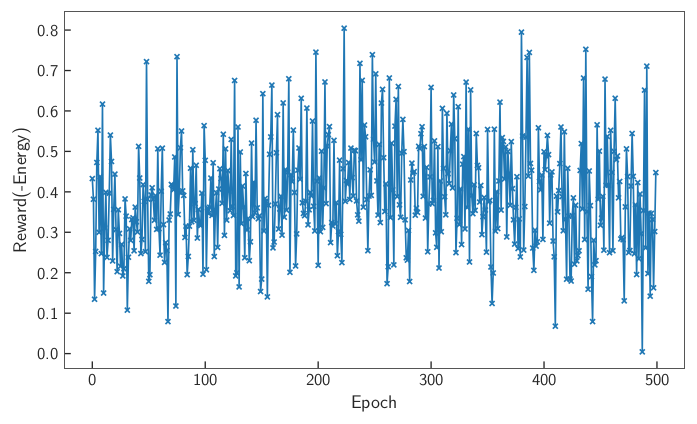

In [27]:
all_cnots_search_rewards_2 = [s[2] for s in all_cnots_2['search_reward_list']]
all_cnots_fine_tune_loss_2 = all_cnots_2['fine_tune_loss']
fig = plot_setup()
plt.plot(list(range(len(all_cnots_search_rewards_2))), all_cnots_search_rewards_2,marker = 'x')
plt.xlabel('Epoch')
plt.ylabel('Reward(-Energy)')
plt.tight_layout()

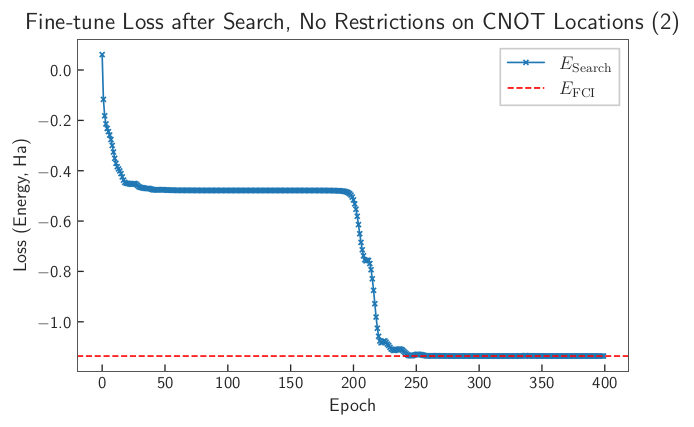

In [16]:
fig = plot_setup()
plt.plot(list(range(len(all_cnots_fine_tune_loss_2))), all_cnots_fine_tune_loss_2, label = r"$E_\mathrm{Search}$",linestyle = '-',marker = 'x')
plt.axhline(y = Min_Energy, color = 'r', linestyle = '--',label = r"$E_\mathrm{FCI}$")
plt.title("Fine-tune Loss after Search, No Restrictions on CNOT Locations (2)")
plt.xlabel('Epoch')
plt.ylabel('Loss (Energy, Ha)')
plt.legend()
plt.show()

In [17]:
print("Final Energy: ", all_cnots_fine_tune_loss_2[-1])

Final Energy:  -1.1361679080470457


In [18]:
pprint(all_cnots_2['op_list'])
print(len(all_cnots_2['op_list']))
# count the number of parameters
all_cnots_num_parameters_2 = 0
for c in all_cnots_2['op_list']:
    if c[2] != None:
        all_cnots_num_parameters_2 = all_cnots_num_parameters_2 + len(c[2])
print()
print(all_cnots_num_parameters_2)

[['Rot', [2], [-0.7214872288373075, -0.4993750916587521, -0.5632615596014126]],
 ['Rot',
  [3],
  [-2.5811012666094753, 3.4731191161487874e-06, -1.540410148602571]],
 ['CNOT', [2, 0], None],
 ['Rot',
  [0],
  [1.5759817410237915, -0.0002766468763746559, -1.3878324820780736]],
 ['CNOT', [0, 3], None],
 ['Rot', [2], [0.2623678420877357, -1.7297849792192908, -0.008037974457258438]],
 ['Rot', [0], [0.5630708992481693, 4.429283626279393e-05, 0.19678228807353898]],
 ['CNOT', [3, 0], None],
 ['Rot', [3], [0.0780992395525031, -0.0007181076906014443, 1.1927928189894563]],
 ['CNOT', [0, 2], None],
 ['Rot',
  [0],
  [0.31993817140937464, -4.164104914137598e-05, -0.3391889801155323]],
 ['CNOT', [2, 1], None],
 ['Rot', [2], [1.2338929820888516, -0.03430038824064808, -2.042056629199187]],
 ['CNOT', [0, 2], None],
 ['Rot', [2], [-1.3305586955254307, 0.18491134654414498, -1.5333254417668365]],
 ['CNOT', [1, 2], None],
 ['Rot', [0], [0.4908150721306061, 3.141604968387204, -1.609715549880802]],
 ['Rot',